In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

In [2]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': False
    }
)
env = gym.make('FrozenLake-v3')

In [3]:
LEFT, DOWN, RIGHT, UP = 0, 1, 2, 3
state, reward, done, info = env.step(RIGHT)
print(state, reward, done, info)
env.render()

1 0.0 False {'prob': 1.0}
  (Right)
SFFF
FHFH
FFFH
HFFG


In [4]:
# Q : 현재 State에서 action을 취할 때 얻을 수 있는 reward
# 16 : 4x4라서 16개임
# 4 : 위, 아래, 왼쪽, 오른쪽

Q = np.zeros([env.observation_space.n, env.action_space.n])
v = 0.99

num_episodes = 10000

rList = []

# Random Noise
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False

    while not done:
        action = np.argmax(Q[state, :]+np.random.randn(env.action_space.n)/(i+1))
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + v*np.max(Q[new_state, :])
        rAll += reward
        state = new_state
    rList.append(rAll)

# E-greedy
# for i in range(num_episodes):
#     state = env.reset()
#     rAll = 0
#     done = False
#     e = 1./(i/100+1)

#     while not done:
#         action = env.action_space.sample() if np.random.rand() < e else np.argmax(Q[state, :])
#         new_state, reward, done, _ = env.step(action)
#         Q[state, action] = reward + v*np.max(Q[new_state, :])
#         rAll += reward
#         state = new_state
#     rList.append(rAll)

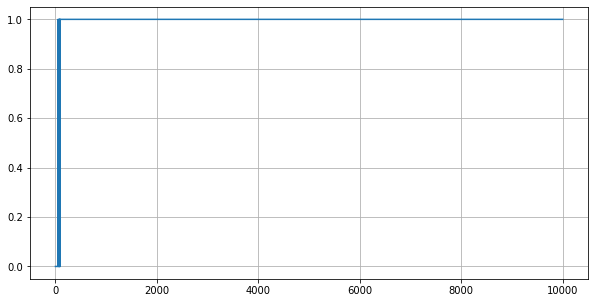

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(rList)
ax.grid()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.show()